In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm


In [4]:
df = pd.read_excel('employee.xlsx')
df

,Education,City,PaymentTier,Age,ExperienceInCurrentDomain
0,Bachelors,Bangalore,3,34,0
1,Bachelors,Pune,1,28,3
2,Bachelors,New Delhi,3,38,2
3,Masters,Bangalore,3,27,5
4,Masters,Pune,3,24,2
...,...,...,...,...,...
4648,Bachelors,Bangalore,3,26,4
4649,Masters,Pune,2,37,2
4650,Masters,New Delhi,3,27,5
4651,Bachelors,Bangalore,3,30,2


In [5]:
df_dtypes = pd.DataFrame({'Columns':df.columns})

lst_nilai = []
for i in df_dtypes['Columns']:
  lst_nilai.append(df[[i]].sample(1).values[[0]])

df_dtypes['Value'] = lst_nilai
df_dtypes['Data Types'] = df.dtypes.values

df_dtypes = df_dtypes.reset_index().drop(columns = ['index'])
df_dtypes

,Columns,Value,Data Types
0,Education,[[Masters]],object
1,City,[[Bangalore]],object
2,PaymentTier,[[3]],int64
3,Age,[[29]],int64
4,ExperienceInCurrentDomain,[[2]],int64


In [7]:
df.drop(columns=['PaymentTier']).columns

Index(['Education', 'City', 'Age', 'ExperienceInCurrentDomain'], dtype='object')

In [8]:
df.isnull().sum()

Education                    0
City                         0
PaymentTier                  0
Age                          0
ExperienceInCurrentDomain    0
dtype: int64

In [9]:
lst_missval = []

for i in df.isnull().sum():
  lst_missval.append((i / len(df) * 100))

df_missval = pd.DataFrame({'Column Name':df.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df.dtypes})

df_missval = df_missval.sort_values(by='Missing Value Percentage (%)', 
                       ascending = False).reset_index().drop(columns = 'index')

df_missval                       


,Column Name,Missing Value Percentage (%),Data Types
0,Education,0.0,object
1,City,0.0,object
2,PaymentTier,0.0,int64
3,Age,0.0,int64
4,ExperienceInCurrentDomain,0.0,int64


In [10]:
df_dummy = df.copy()

df_dummy = pd.get_dummies(df_dummy, drop_first=True)
df_dummy

,PaymentTier,Age,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,3,34,0,0,0,0,0
1,1,28,3,0,0,0,1
2,3,38,2,0,0,1,0
3,3,27,5,1,0,0,0
4,3,24,2,1,0,0,1
...,...,...,...,...,...,...,...
4648,3,26,4,0,0,0,0
4649,2,37,2,1,0,0,1
4650,3,27,5,1,0,1,0
4651,3,30,2,0,0,0,0


C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_1380\324327233.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PaymentTier'], bins=10, kde_kws={'linewidth': 3})


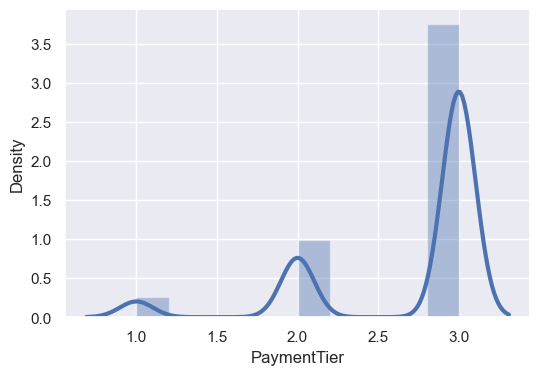

<function matplotlib.pyplot.show(close=None, block=None)>

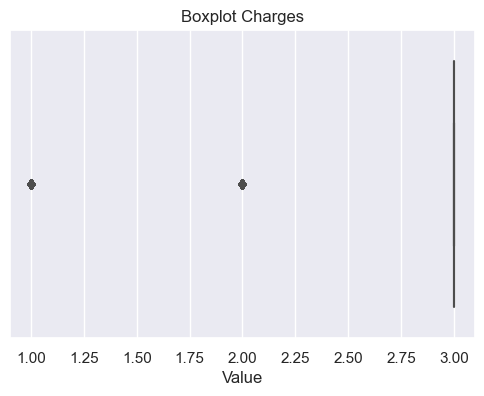

In [12]:
sns.set(rc={'figure.figsize':(6,4)}) 
sns.distplot(df['PaymentTier'], bins=10, kde_kws={'linewidth': 3})
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['PaymentTier'], color='grey')
plt.xlabel('Value')
plt.title('Boxplot Charges')
plt.show

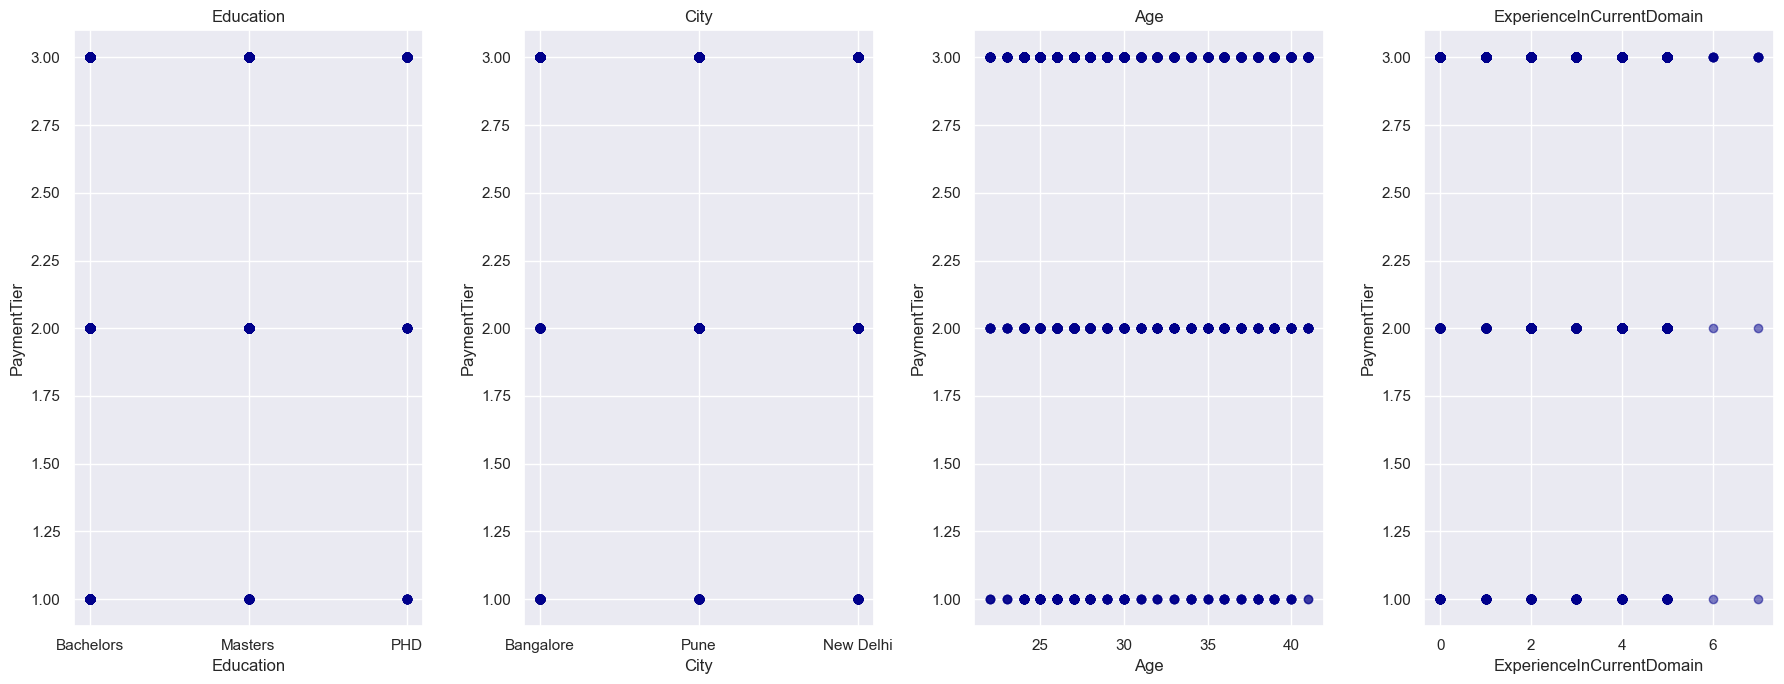

In [14]:
plt.figure(figsize=(18, 7))

predictors = df.drop(columns=['PaymentTier']).columns
response = df['PaymentTier']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df[col]
    y = response
    plt.scatter(x, y, marker='o', color='darkblue', alpha=0.5)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PaymentTier')
    plt.tight_layout()

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_1380\1123542352.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr())) #agar yang muncul segitiga bawah
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_1380\1123542352.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson').round(2), annot=True, cmap='PRGn', mask=mask, vmin=-1, vmax=1)


<Axes: >

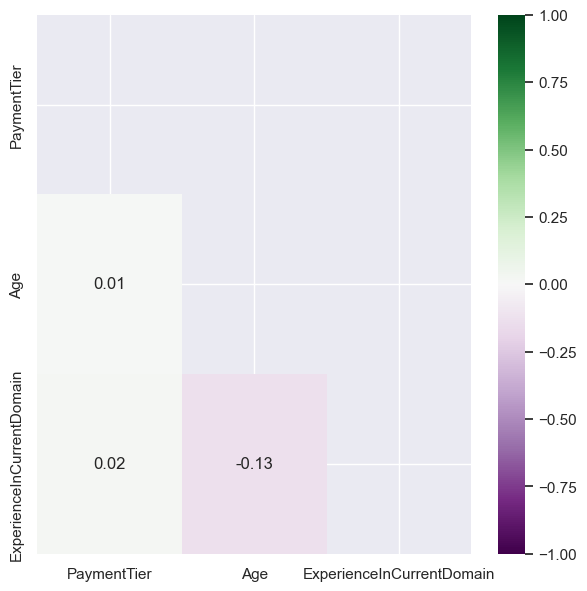

In [15]:
#untuk mengetahui korelasi linier antar variabel
mask = np.triu(np.ones_like(df.corr())) #agar yang muncul segitiga bawah
 
# annot = True untuk mencetak/ menampilkan nilai korelasi di dalam kotak
sns.set(rc={'figure.figsize':(7,7)}) 
sns.heatmap(df.corr(method='pearson').round(2), annot=True, cmap='PRGn', mask=mask, vmin=-1, vmax=1)

In [16]:
x_dummy = df_dummy.drop(columns=['PaymentTier'])
y_dummy = df_dummy['PaymentTier']

X_dummy = sm.add_constant(x_dummy)
result_dummy = sm.OLS(y_dummy, X_dummy).fit()
print(result_dummy.summary())

                            OLS Regression Results                            
Dep. Variable:            PaymentTier   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     95.03
Date:                Tue, 02 May 2023   Prob (F-statistic):          5.36e-113
Time:                        20:54:22   Log-Likelihood:                -3646.5
No. Observations:                4653   AIC:                             7307.
Df Residuals:                    4646   BIC:                             7352.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

# Persamaan regresi dari output tersebut adalah:

PaymentTier = 2.8677 - 4.586e-05(Age) + 0.0053(Experience) - 0.2088(Education_masters) + 0.0077(Education_PHD)  -0.1908(New Delhi) - 0.3561(Pune)

Keterangan:

- PaymentTier : variabel dependen (Tingkat bayaran karyawan)
- Age, Experience, Education, City : Variabel independen(umur karyawan, pengalaman karyawan, edukasi terakhir karyawan, kota tempat kerja karyawan)

In [17]:
df_simultan_dummy = pd.DataFrame({'F-hitung':[result_dummy.fvalue],
                                  'p-value':[result_dummy.f_pvalue],
                                  'alpha':[0.05]})

df_simultan_dummy['Kesimpulan'] = df_simultan_dummy['p-value'].gt((df_simultan_dummy['alpha']))
df_simultan_dummy['Kesimpulan'] = df_simultan_dummy['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_simultan_dummy

,F-hitung,p-value,alpha,Kesimpulan
0,95.027974,5.361701e-113,0.05,Tolak H0


### Kesimpulan
Dengan tingkat signifikansi 5%, dikarenakan p-value < alpha, maka tolak H0 dan dapat disimpulkan bahwa setidaknya ada satu variabel x yang mempengaruhi variabel y

In [18]:
df_partial_dummy = pd.DataFrame()
df_partial_dummy['Variabel'] = result_dummy.tvalues.index
df_partial_dummy['t-hitung'] = result_dummy.tvalues.values
df_partial_dummy['p-value'] = result_dummy.pvalues.values
df_partial_dummy['alpha'] = 0.05

df_partial_dummy['Kesimpulan'] = df_partial_dummy['p-value'].gt((df_partial_dummy['alpha']))
df_partial_dummy['Kesimpulan'] = df_partial_dummy['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_partial_dummy

,Variabel,t-hitung,p-value,alpha,Kesimpulan
0,const,53.664457,0.000000e+00,0.05,Tolak H0
1,Age,-0.028186,9.775152e-01,0.05,Gagal Tolak H0
2,ExperienceInCurrentDomain,1.043151,2.969328e-01,0.05,Gagal Tolak H0
3,Education_Masters,-9.450000,5.225299e-21,0.05,Tolak H0
4,Education_PHD,0.186225,8.522762e-01,0.05,Gagal Tolak H0
5,City_New Delhi,-8.896971,8.077517e-19,0.05,Tolak H0
6,City_Pune,-18.875530,1.251562e-76,0.05,Tolak H0


### Kesimpulan
Dengan tingkat signifikansi 5 %, dikarenakan p-value `city_new Delhi` dan p-value `city_Pune` < alpha, maka tolak H0 dan dapat disimpulkan bahwa variabel tersebut mempengaruhi tingkat bayaran kerja(Y)

In [19]:
df_model_evaluation = pd.DataFrame({'Model': 'Regression + Dummy Encoding',
                                    'R-Square': result_dummy.rsquared,
                                    'Adjusted R-Square': result_dummy.rsquared_adj}, index = [1])

df_model_evaluation

,Model,R-Square,Adjusted R-Square
1,Regression + Dummy Encoding,0.109308,0.108158


Berdasarkan output yang diberikan, terdapat evaluasi model regresi linier dengan Dummy Encoding:

- Model 1 (Regression + Dummy Encoding) memiliki R-Square sebesar 0.109308, yang menunjukkan bahwa model mampu menjelaskan sekitar 10.93% dari variasi dalam variabel target (Total Power). Nilai ini juga menunjukkan bahwa model masih belum cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen.

- Model 1 (Regression + Dummy Encoding) memiliki Adjusted R-Square sebesar 0.108158, yang menunjukkan bahwa model mampu menjelaskan sekitar 10.81% dari variasi dalam variabel target setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model. Nilai ini juga menunjukkan bahwa model masih kurang baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model.



Secara keseluruhan, model regresi menunjukkan kinerja yang mmasih belum cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen.